<a href="https://colab.research.google.com/github/Alvirabanu/iiith-internship/blob/main/Object_detection_ambulance_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Wed Feb 28 05:37:42 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   49C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
import os
HOME=os.getcwd()
print(HOME)

/content


In [3]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 716.2/716.2 kB 10.8 MB/s eta 0:00:00


In [5]:
from IPython import display
display.clear_output()
!yolo checks

Ultralytics YOLOv8.1.19 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.3/78.2 GB disk)

OS                  Linux-6.1.58+-x86_64-with-glibc2.35
Environment         Colab
Python              3.10.12
Install             pip
RAM                 12.67 GB
CPU                 Intel Xeon 2.00GHz
CUDA                12.1

matplotlib          ✅ 3.7.1>=3.3.0
opencv-python       ✅ 4.8.0.76>=4.6.0
pillow              ✅ 9.4.0>=7.1.2
pyyaml              ✅ 6.0.1>=5.3.1
requests            ✅ 2.31.0>=2.23.0
scipy               ✅ 1.11.4>=1.4.1
torch               ✅ 2.1.0+cu121>=1.8.0
torchvision         ✅ 0.16.0+cu121>=0.9.0
tqdm                ✅ 4.66.2>=4.64.0
psutil              ✅ 5.9.5
py-cpuinfo          ✅ 9.0.0
thop                ✅ 0.1.1-2209072238>=0.1.1
pandas              ✅ 1.5.3>=1.1.4
seaborn             ✅ 0.13.1>=0.11.0


In [6]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="6lYW9nzRClrCAI1ry4OH")
project = rf.workspace("jacob-solawetz").project("vehicles-openimages-archived")
dataset = project.version(1).download("yolov8-obb")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.2/70.2 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.7/86.7 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.4 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.9.0.80
    Uninstalling opencv-python-headless-4.9.0.80:
      Successfully uninstalled opencv-python-headless-4.9.0.80
  Attempting uninstall: idna
    Found existing installation: idna 3.6
    Uninstalling idna-3.6:
      Successfully uninstalled idna-3.6
  Attempting uninstall: cycler
    Found existing installation: cycler 

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Vehicles-OpenImages-1 in yolov8-obb:: 100%|██████████| 1266/1266 [00:00<00:00, 8096.03it/s]


In [7]:
!yolo task=detect mode=train model=yolov8n.pt data={dataset.location}/data.yaml epochs=20 imgsz=120

100% 6.23M/6.23M [00:00<00:00, 134MB/s]
Ultralytics YOLOv8.1.19 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/Vehicles-OpenImages-1/data.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=120, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, sa

In [9]:
!ls {HOME}/runs/detect/train/

args.yaml					    R_curve.png		val_batch0_labels.jpg
confusion_matrix_normalized.png			    results.csv		val_batch0_pred.jpg
confusion_matrix.png				    results.png		val_batch1_labels.jpg
events.out.tfevents.1709098869.00ccd6aff480.2171.0  train_batch0.jpg	val_batch1_pred.jpg
F1_curve.png					    train_batch1.jpg	val_batch2_labels.jpg
labels_correlogram.jpg				    train_batch280.jpg	val_batch2_pred.jpg
labels.jpg					    train_batch281.jpg	weights
P_curve.png					    train_batch282.jpg
PR_curve.png					    train_batch2.jpg


In [10]:
from IPython.display import display, Image

/content


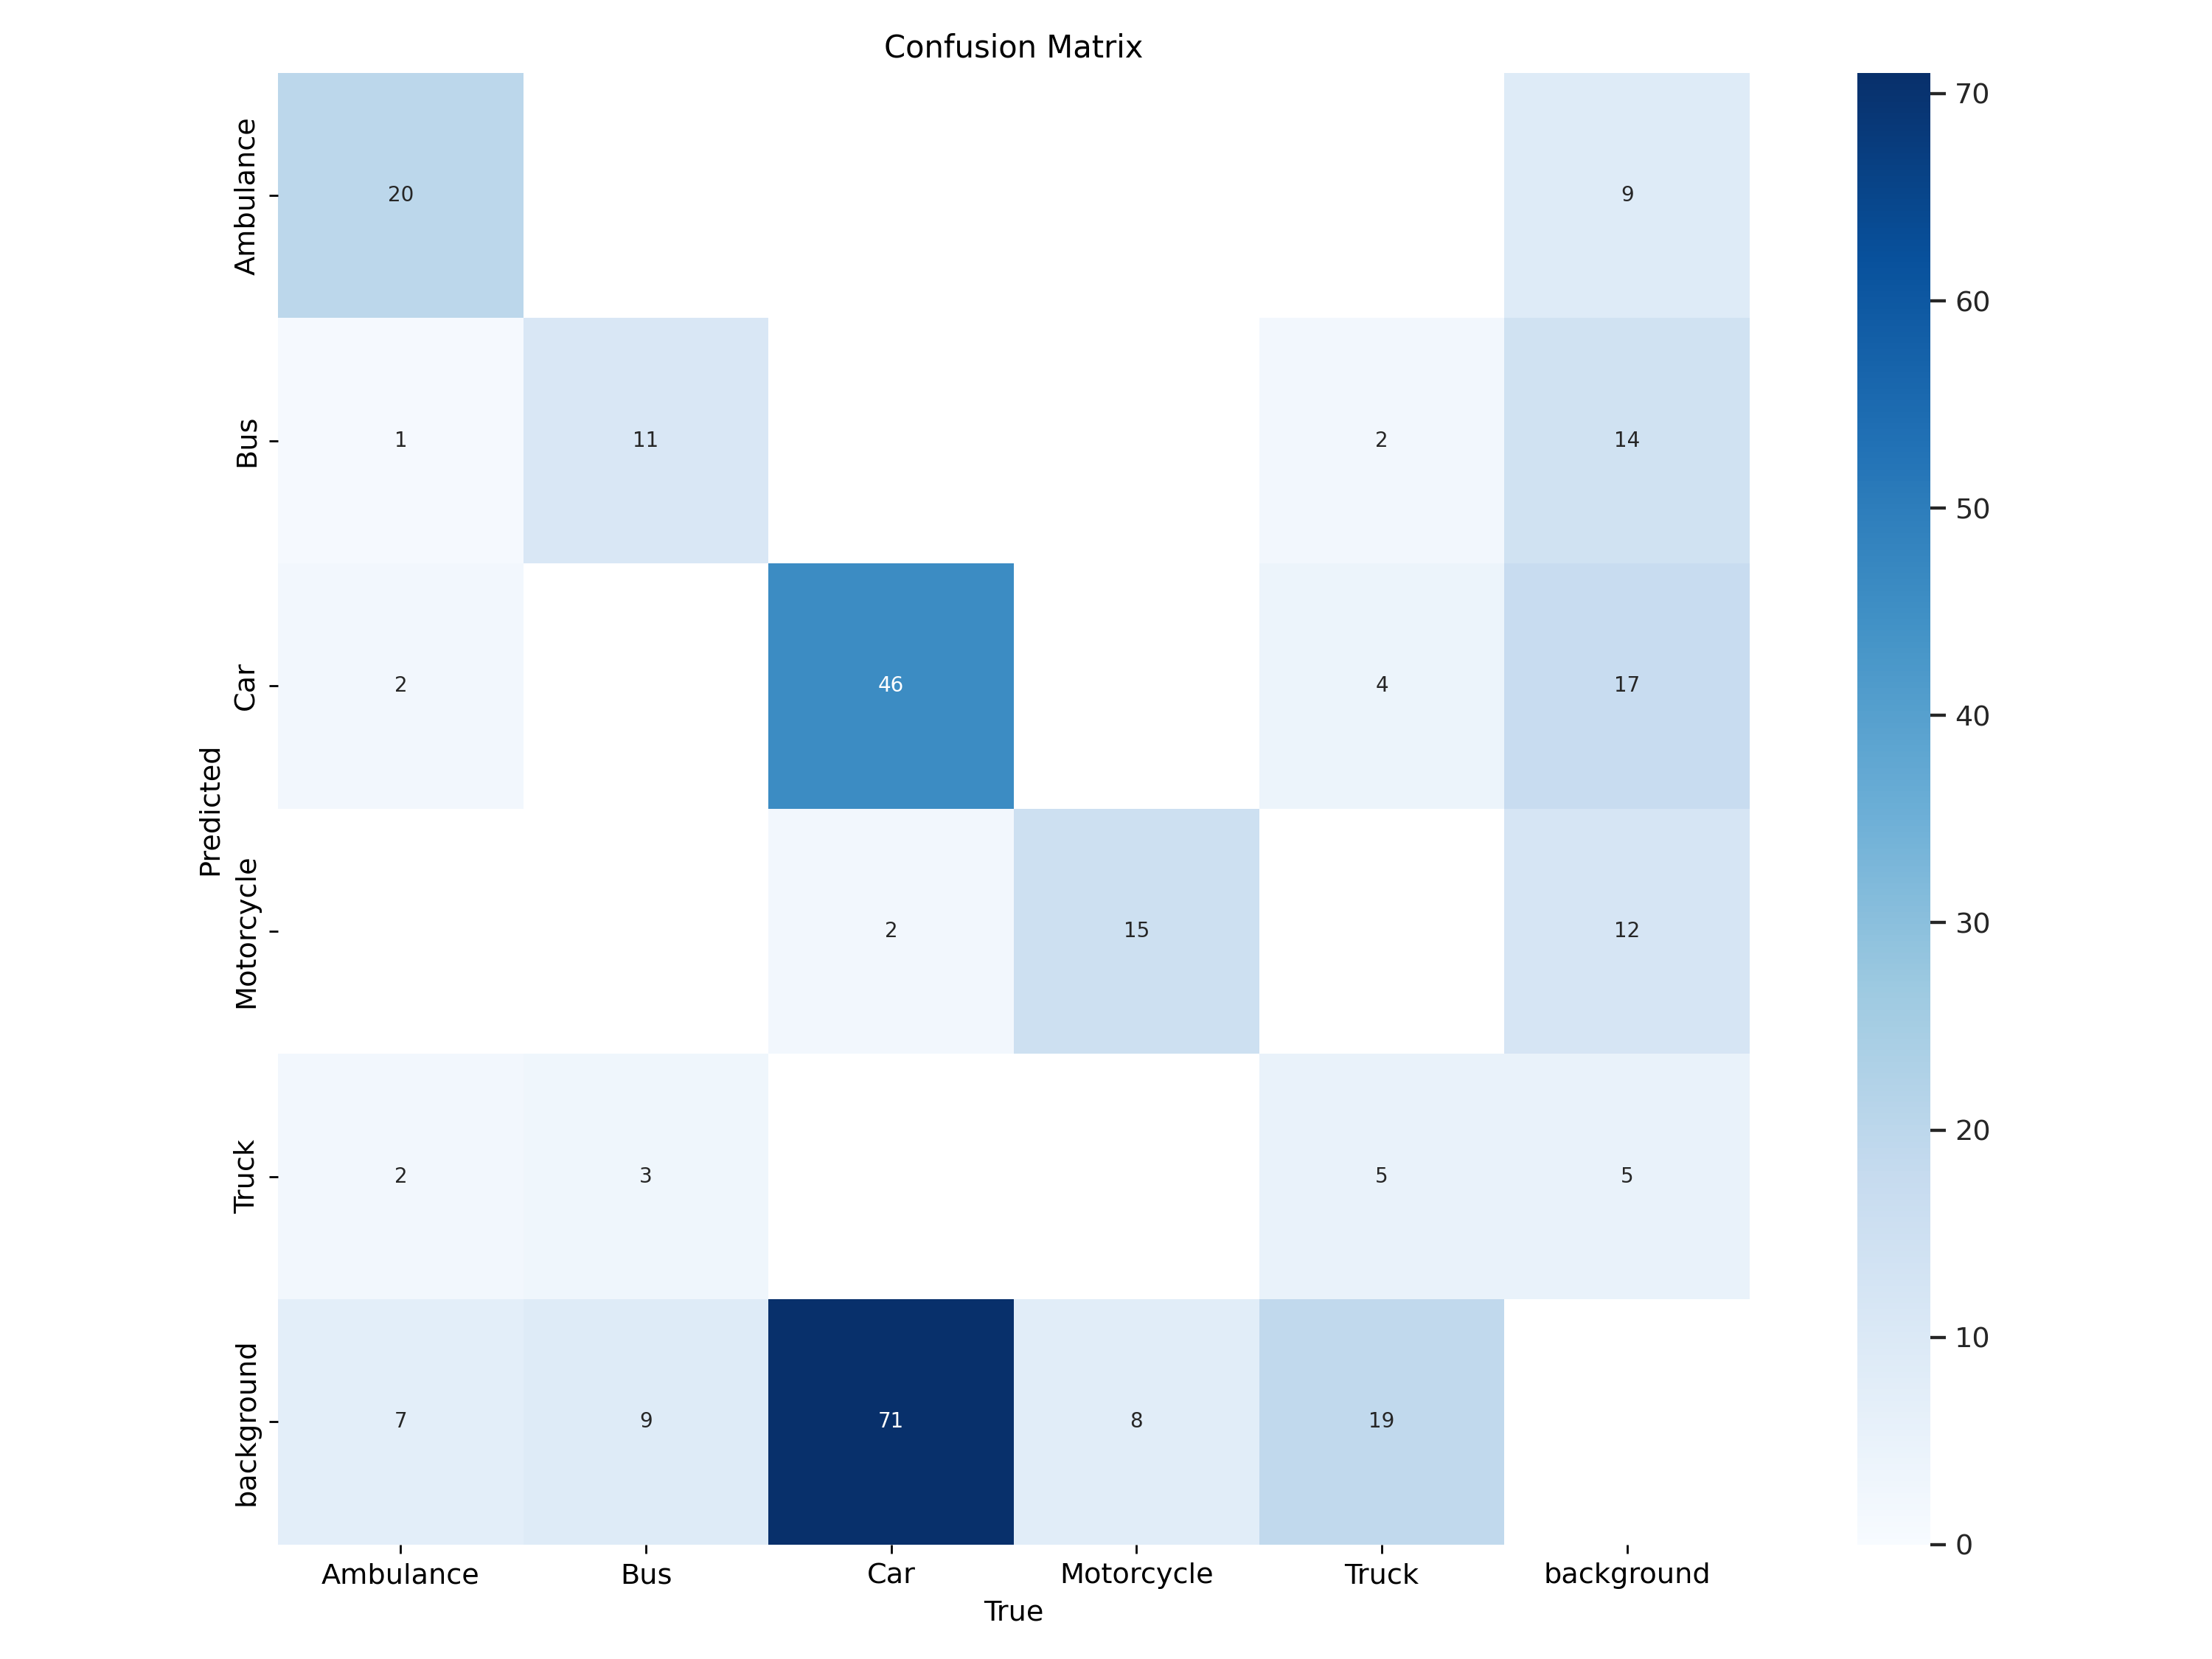

In [11]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=800)

/content


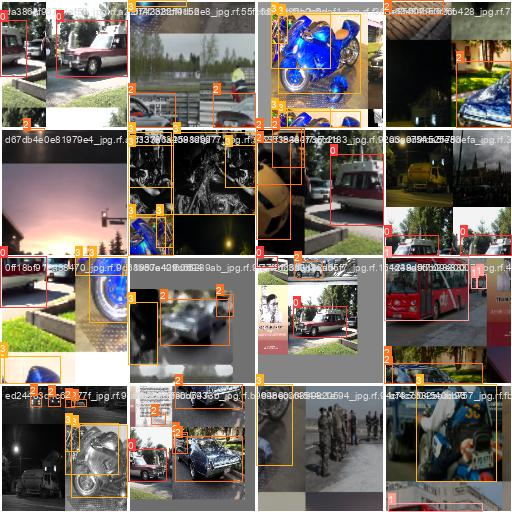

In [12]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/train_batch1.jpg', width=200)

/content


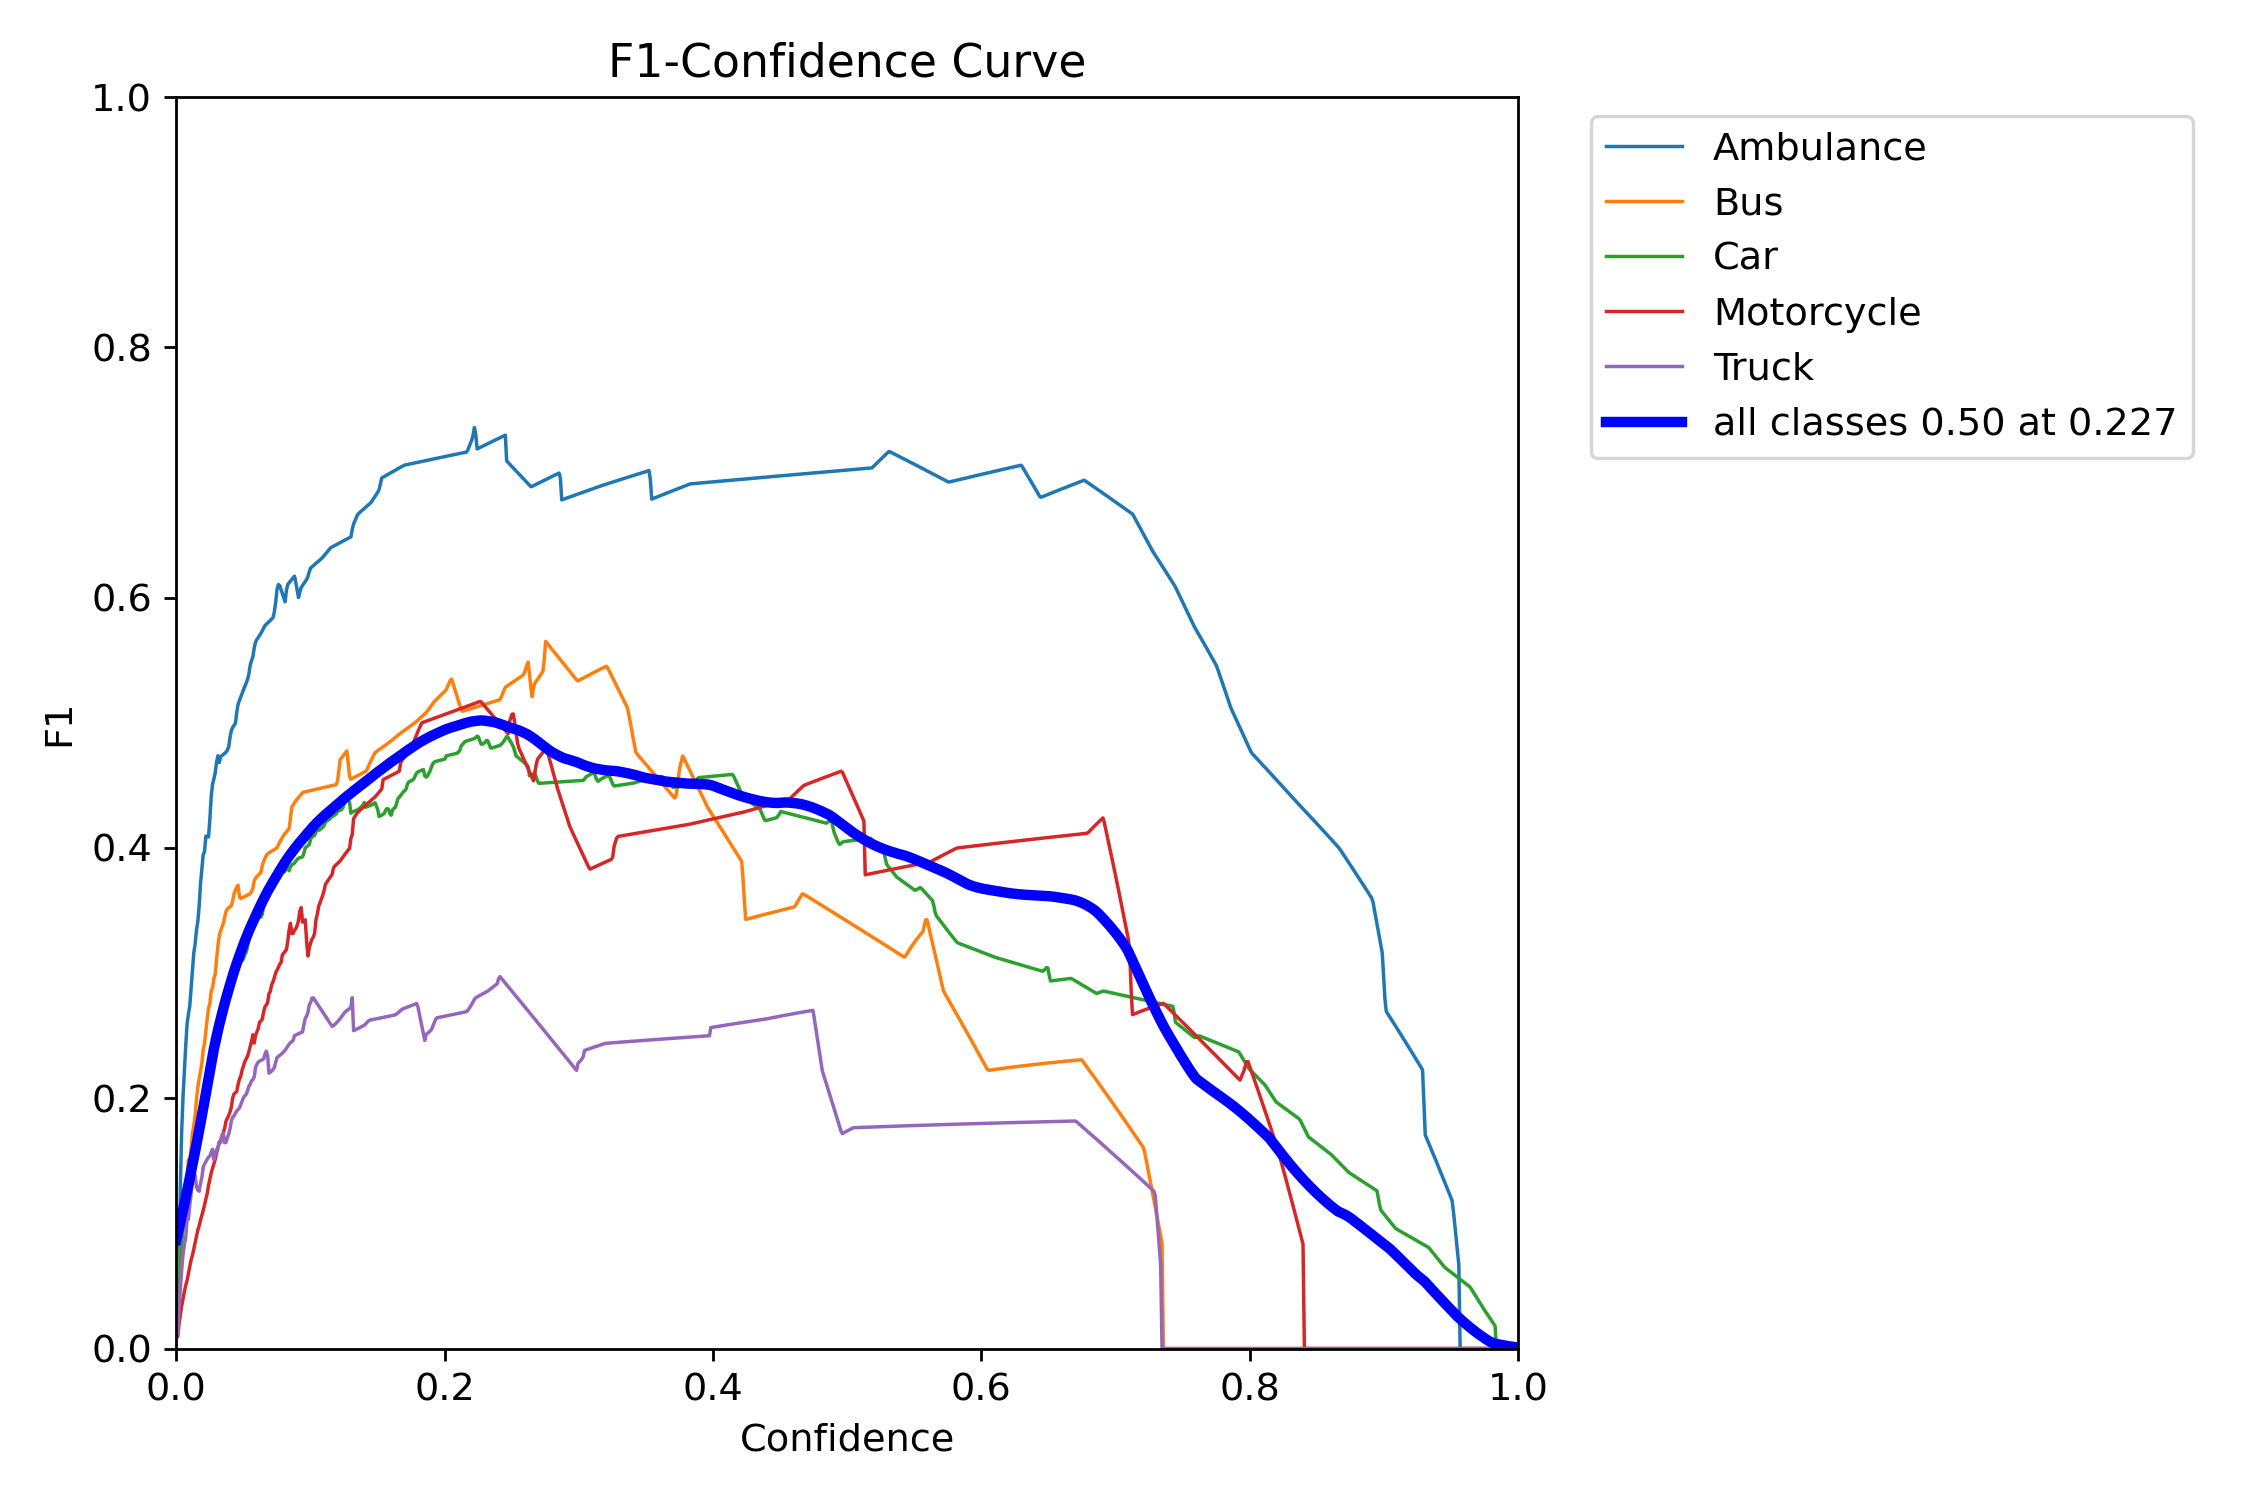

In [13]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/F1_curve.png', width=800)

In [14]:
%cd
!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/root
Ultralytics YOLOv8.1.19 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3006623 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /content/Vehicles-OpenImages-1/valid/labels.cache... 125 images, 0 backgrounds, 0 corrupt: 100% 125/125 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 8/8 [00:03<00:00,  2.63it/s]
                   all        125        227      0.511      0.523      0.479      0.354
             Ambulance        125         32      0.722      0.719      0.776      0.631
                   Bus        125         23      0.445      0.609      0.488      0.396
                   Car        125        119      0.603      0.403      0.422      0.267
            Motorcycle        125         23      0.428       0.65      0.473        0.3
                 Truck        125         30      0.359      0.233      0.236      0.175
Speed: 0.2ms preprocess, 3.2ms infe

In [15]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images

/content
Ultralytics YOLOv8.1.19 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3006623 parameters, 0 gradients, 8.1 GFLOPs

image 1/63 /content/Vehicles-OpenImages-1/test/images/00dea1edf14f09ab_jpg.rf.e88c0cbf2d2fa49acf7710d4962b3835.jpg: 128x128 1 Ambulance, 19.9ms
image 2/63 /content/Vehicles-OpenImages-1/test/images/00e481ea1a520175_jpg.rf.49a7562e0ada29cc96e9da3321c96b70.jpg: 128x128 1 Bus, 10.3ms
image 3/63 /content/Vehicles-OpenImages-1/test/images/08c8b73e0c2e296e_jpg.rf.24496f1095ffd45262fd1f9d9865e94a.jpg: 128x128 1 Bus, 6.9ms
image 4/63 /content/Vehicles-OpenImages-1/test/images/10c26c6598677a1f_jpg.rf.ee3114415966e1cb8cbf10064b4607ff.jpg: 128x128 1 Motorcycle, 9.6ms
image 5/63 /content/Vehicles-OpenImages-1/test/images/1ef77c61856d3b4b_jpg.rf.76fa06bea222a369099ae15217c75cd9.jpg: 128x128 1 Motorcycle, 9.9ms
image 6/63 /content/Vehicles-OpenImages-1/test/images/259ff749ac781352_jpg.rf.0f5cde8bd9706b401e535d42f4c9f859.jpg: 1

/content


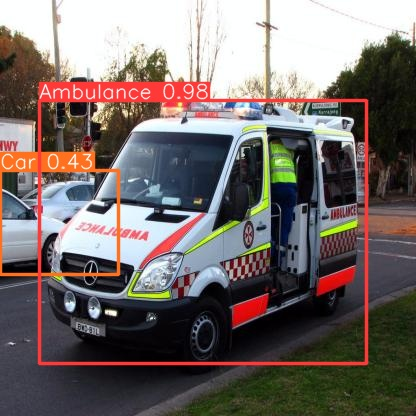

In [16]:
%cd {HOME}
Image(filename=f'/content/runs/detect/predict/b52533fcc735c023_jpg.rf.5c34c680bf9d1a3855cedc2925d351eb.jpg', width=800)

**It has predicted with our model now we test it with a new downloaded image which the model have not seen before.**

/content


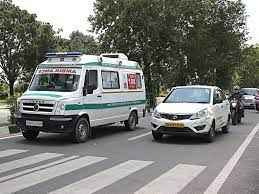

In [17]:
%cd {HOME}
Image(filename=f'/content/download.jpg', width=600)

In [19]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source=/content/download.jpg

/content
Ultralytics YOLOv8.1.19 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3006623 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/download.jpg: 96x128 1 Ambulance, 1 Car, 93.8ms
Speed: 0.8ms preprocess, 93.8ms inference, 490.2ms postprocess per image at shape (1, 3, 96, 128)
Results saved to runs/detect/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


/content


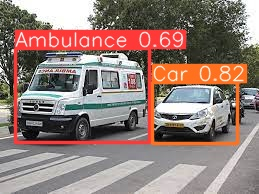

In [20]:
%cd {HOME}
Image(filename=f'/content/runs/detect/predict2/download.jpg', width= 500 )